In [134]:
import pandas as pd
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [135]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [136]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [137]:
pd.value_counts(train['Embarked'])

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [138]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
def pre_processing(data):
    """
    Nanデータの補正と数値データに直す
    各データの中央値で埋める
    """
    data.Age = data.Age.fillna(data.Age.median())
    data.Fare = data.Fare.fillna(data.Fare.median())
    data.Embarked = data.Embarked.fillna('S')
    data.Sex = LE.fit_transform(data['Sex'])
    data.Embarked = LE.fit_transform(data['Embarked'])
    return data
train = pre_processing(train)
test = pre_processing(test)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2


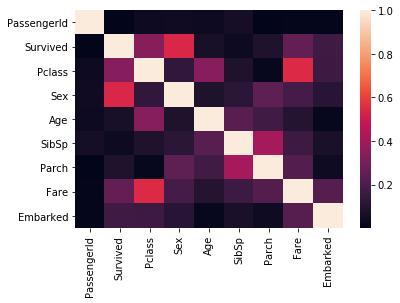

In [139]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
sns.heatmap(np.fabs(train.corr()))

In [140]:
predictors = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
train_x = train[predictors]
train_t = train['Survived']
test_x = test[predictors]

In [141]:
from sklearn.preprocessing import StandardScaler
all_x = pd.concat([train_x,test_x])
std_scale = StandardScaler().fit(all_x)
train_x = std_scale.transform(train_x)
test_x = std_scale.transform(test_x)
train_x

array([[ 0.84191642,  0.74349692, -0.57608755, ..., -0.4449995 ,
        -0.50329106,  0.62227932],
       [-1.54609786, -1.34499549,  0.66322907, ..., -0.4449995 ,
         0.73474365, -1.83492621],
       [ 0.84191642, -1.34499549, -0.26625839, ..., -0.4449995 ,
        -0.49024046,  0.62227932],
       ..., 
       [ 0.84191642, -1.34499549, -0.11134382, ...,  1.86652569,
        -0.1900765 ,  0.62227932],
       [-1.54609786,  0.74349692, -0.26625839, ..., -0.4449995 ,
        -0.06343727, -1.83492621],
       [ 0.84191642,  0.74349692,  0.19848534, ..., -0.4449995 ,
        -0.49362395, -0.60632344]])

In [142]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(train_x, train_t)
train_pred = gnb.predict_proba(train_x)
test_pred = gnb.predict_proba(test_x)
train_pred

array([[ 0.96273111,  0.03726889],
       [ 0.00555242,  0.99444758],
       [ 0.40055875,  0.59944125],
       ..., 
       [ 0.38080282,  0.61919718],
       [ 0.3674612 ,  0.6325388 ],
       [ 0.94507609,  0.05492391]])

In [143]:
train_x = np.c_[train_x, train_pred]
test_x = np.c_[test_x, test_pred]
train_x

array([[ 0.84191642,  0.74349692, -0.57608755, ...,  0.62227932,
         0.96273111,  0.03726889],
       [-1.54609786, -1.34499549,  0.66322907, ..., -1.83492621,
         0.00555242,  0.99444758],
       [ 0.84191642, -1.34499549, -0.26625839, ...,  0.62227932,
         0.40055875,  0.59944125],
       ..., 
       [ 0.84191642, -1.34499549, -0.11134382, ...,  0.62227932,
         0.38080282,  0.61919718],
       [-1.54609786,  0.74349692, -0.26625839, ..., -1.83492621,
         0.3674612 ,  0.6325388 ],
       [ 0.84191642,  0.74349692,  0.19848534, ..., -0.60632344,
         0.94507609,  0.05492391]])

In [146]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.grid_search import GridSearchCV
tuned_parameters = [{
    'gamma': [10**i for i in range(-4, 0)],
    'C': [10**i for i in range(0, 4)]
}]
gscv = GridSearchCV(SVC(), tuned_parameters, cv=5, scoring="accuracy", n_jobs=-1)
gscv.fit(train_x, train_t)
print("Best Model Parameter: ",gscv.best_params_)
print("Best Model Score    : ",gscv.best_score_)
grid_best_model = gscv.best_estimator_

Best Model Parameter:  {'C': 10, 'gamma': 0.1}
Best Model Score    :  0.8282828282828283


In [147]:
predictions = grid_best_model.predict(test_x)
predictions

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0,

In [149]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": predictions
    })
submission.to_csv('data/submission.csv', index=False)